In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import streamlit as st
import io
from sklearn.model_selection import train_test_split

In [2]:
#load csv file
df = pd.read_csv("6G_IoT_Beamforming_Dataset.csv")

In [3]:
df.head()

,Obstacle Density,Mobility (m/s),Frequency (GHz),Transmit Power (dBm),Number of Antennas,Codebook Size,Bandwidth (MHz),Interference Level (dB),SIFT Keypoints,Beamforming Gain (dB),...,Energy Consumption (kWh/Gb),Throughput (Mbps),Beam Training Time (s),SNR Improvement (dB),Processing Time (ms),Memory Usage (MB),Environment_Outdoor,Device Type_IoT Sensor,Device Type_Smartphone,Optimized
0,6,2.612250,60,34.668228,64,32,50,-77.336627,188,17.488644,...,0.048494,193.611209,0.164452,10.606301,2.139873,333,False,False,False,0
1,1,1.335916,60,16.784149,64,128,200,-57.341209,454,14.084285,...,0.028494,448.935997,0.032495,17.690996,2.558624,326,True,False,True,0
2,9,1.544452,150,12.464573,256,256,100,-70.933949,215,12.540947,...,0.026507,303.489274,0.153654,14.267229,1.002558,298,False,False,True,0
3,1,1.077700,28,30.732856,256,32,100,-96.053507,451,19.312282,...,0.020258,862.049791,0.028643,16.274246,2.866644,443,False,True,False,1
4,5,1.778853,28,27.666888,512,64,50,-90.416434,276,20.784861,...,0.010403,377.709848,0.094914,8.210001,2.946267,355,False,True,False,0


In [4]:
#Looking at the data, it is clear that the date can be segmented into:
#1 Network Parameters viz: Transmit power, Bandwidth,Frequency,codebook size.
#2 Environmental Factors viz: Obstacle density, Mobility, Interference level, Indoor/Outdoor classification.
#3 Device features: Number of Antennas, Device type
#4 Computer Vision: Extracted SIFT points for intelligent beam forming decisions
#5 Performance metrics: Beamforming Gain (dB) – Measures signal strength improvement,Latency (ms) – Transmission delay in milliseconds,
    #Energy Consumption (kWh/Gb) – Power efficiency metric,Throughput (Mbps) – Data transmission rate,Beam Training Time (s) – Time taken for beam alignment'
    #SNR Improvement (dB) – Signal-to-noise ratio enhancement,Processing Time (ms) – Computational overhead,Memory Usage (MB) – Resource consumption.
#6 Target variable: Optimized
# Potential Use Cases:
    #🔹 Machine Learning & AI: Train models for predictive beamforming optimization.
    #🔹 6G & IoT Research: Analyze next-gen network efficiency improvements.
    #🔹 Computer Vision in Wireless Networks: Investigate CV’s role in optimizing signal transmission.
    #🔹 Performance Benchmarking: Compare various beamforming strategies for 6G.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Obstacle Density             1000 non-null   int64  
 1   Mobility (m/s)               1000 non-null   float64
 2   Frequency (GHz)              1000 non-null   int64  
 3   Transmit Power (dBm)         1000 non-null   float64
 4   Number of Antennas           1000 non-null   int64  
 5   Codebook Size                1000 non-null   int64  
 6   Bandwidth (MHz)              1000 non-null   int64  
 7   Interference Level (dB)      1000 non-null   float64
 8   SIFT Keypoints               1000 non-null   int64  
 9   Beamforming Gain (dB)        1000 non-null   float64
 10  Latency (ms)                 1000 non-null   float64
 11  Energy Consumption (kWh/Gb)  1000 non-null   float64
 12  Throughput (Mbps)            1000 non-null   float64
 13  Beam Training Time 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Obstacle Density,1000.0,4.917000,2.608240,1.000000,3.000000,5.000000,7.000000,9.000000
Mobility (m/s),1000.0,1.496156,0.862474,0.004695,0.748015,1.532466,2.212357,2.998241
Frequency (GHz),1000.0,84.706000,45.165933,28.000000,60.000000,100.000000,100.000000,150.000000
Transmit Power (dBm),1000.0,22.160088,7.220046,10.004663,15.966076,21.981794,28.362225,34.940571
Number of Antennas,1000.0,233.728000,168.696083,64.000000,112.000000,128.000000,256.000000,512.000000
Codebook Size,1000.0,120.288000,86.590848,32.000000,64.000000,64.000000,256.000000,256.000000
Bandwidth (MHz),1000.0,179.850000,131.277230,50.000000,50.000000,100.000000,200.000000,400.000000
Interference Level (dB),1000.0,-74.935147,14.161434,-99.936596,-86.720451,-74.565603,-63.332604,-50.007538
SIFT Keypoints,1000.0,297.557000,114.304699,100.000000,193.000000,299.000000,392.000000,499.000000
Beamforming Gain (dB),1000.0,17.580803,4.405323,10.020333,13.914243,17.476982,21.440149,24.996119


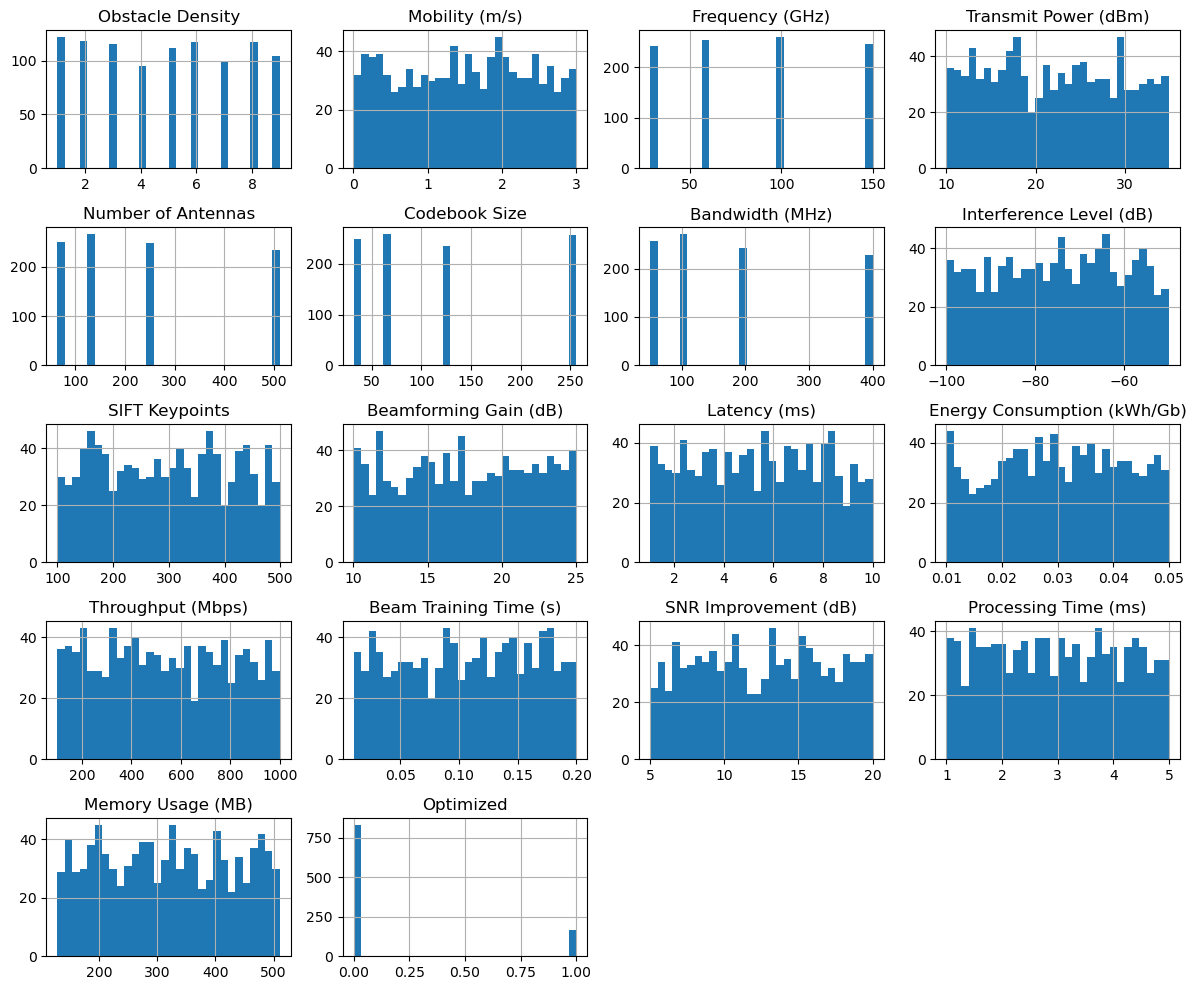

In [7]:
#univariate analysis
df.hist(figsize=(12, 10), bins=30,)
plt.tight_layout()
plt.show()

In [8]:
df.columns.tolist()

['Obstacle Density',
 'Mobility (m/s)',
 'Frequency (GHz)',
 'Transmit Power (dBm)',
 'Number of Antennas',
 'Codebook Size',
 'Bandwidth (MHz)',
 'Interference Level (dB)',
 'SIFT Keypoints',
 'Beamforming Gain (dB)',
 'Latency (ms)',
 'Energy Consumption (kWh/Gb)',
 'Throughput (Mbps)',
 'Beam Training Time (s)',
 'SNR Improvement (dB)',
 'Processing Time (ms)',
 'Memory Usage (MB)',
 'Environment_Outdoor',
 'Device Type_IoT Sensor',
 'Device Type_Smartphone',
 'Optimized']

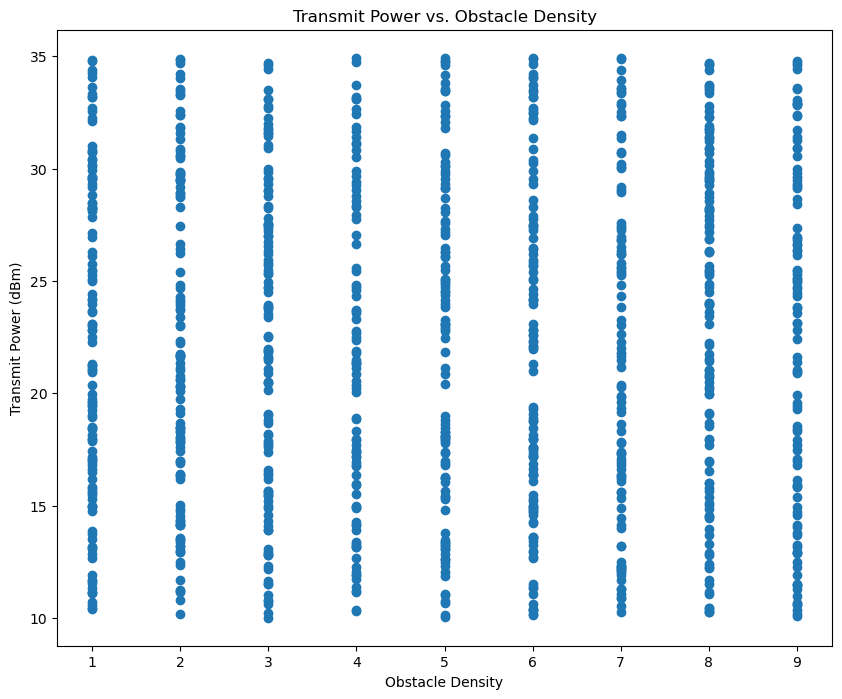

In [9]:
#Bivariate analysis
plt.figure(figsize=(10,8))
plt.scatter(y = df['Transmit Power (dBm)'], x = df['Obstacle Density'])
plt.xlabel('Obstacle Density')
plt.ylabel('Transmit Power (dBm)')
plt.title('Transmit Power vs. Obstacle Density')
plt.show()


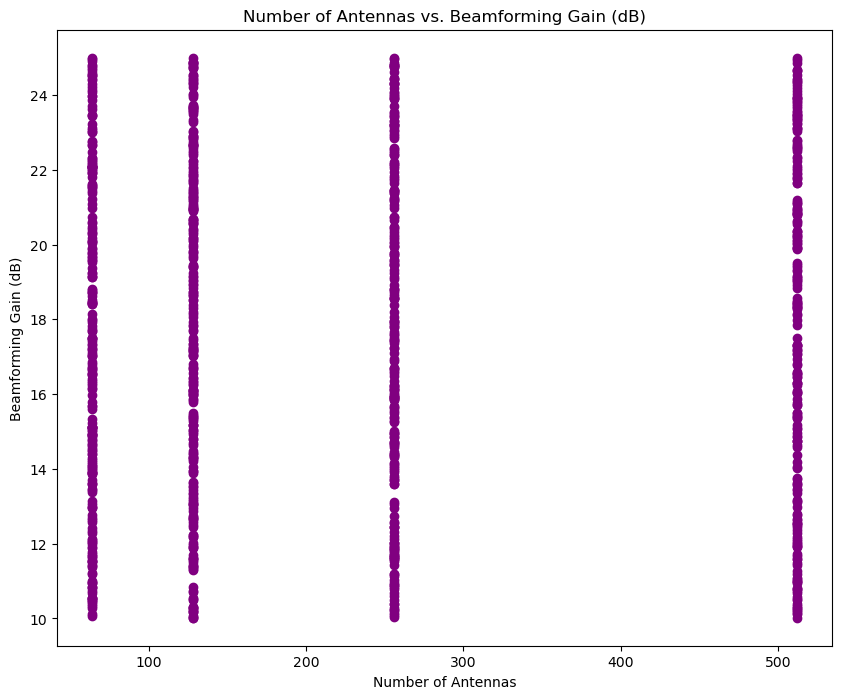

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x = df['Number of Antennas'], y = df['Beamforming Gain (dB)'], color = 'purple')
plt.xlabel('Number of Antennas')
plt.ylabel('Beamforming Gain (dB)')
plt.title('Number of Antennas vs. Beamforming Gain (dB)')
plt.show()

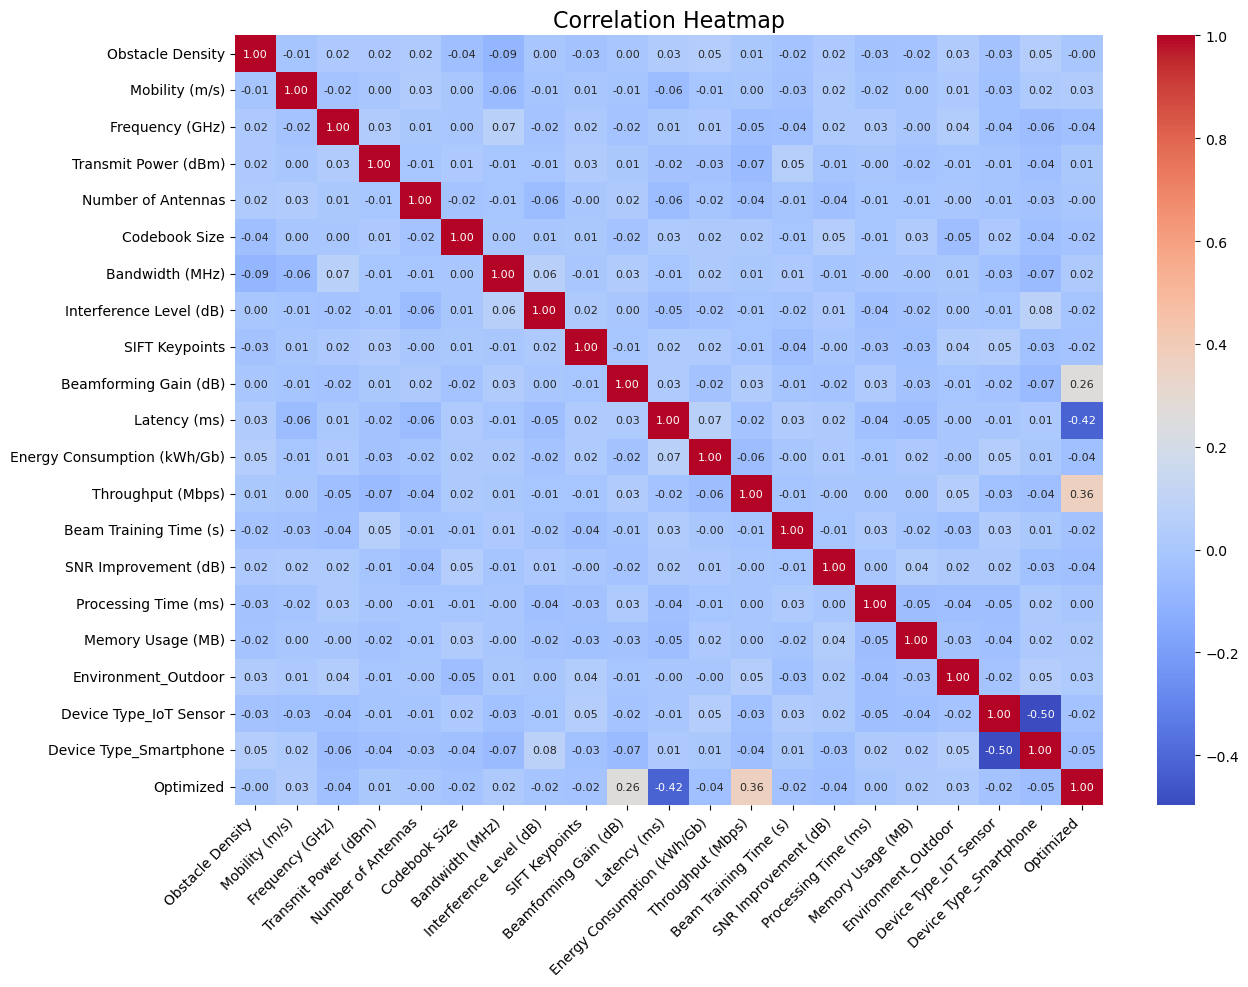

In [11]:
corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [84]:
#convert bools to int
bool_cols = ["Environment_Outdoor", "Device Type_IoT Sensor", "Device Type_Smartphone"]
df[bool_cols] = df[bool_cols].astype(int)


In [86]:
x = df.drop("Optimized", axis =1)
y = df["Optimized"]

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [90]:
#Train Random forest model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
#Predict
y_pred = model.predict(x_test)

In [100]:
#Evaluate
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R2 score Value:", r2_score(y_test, y_pred))

Mean squared error: 0.003596
R2 score Value: 0.9745145287030474


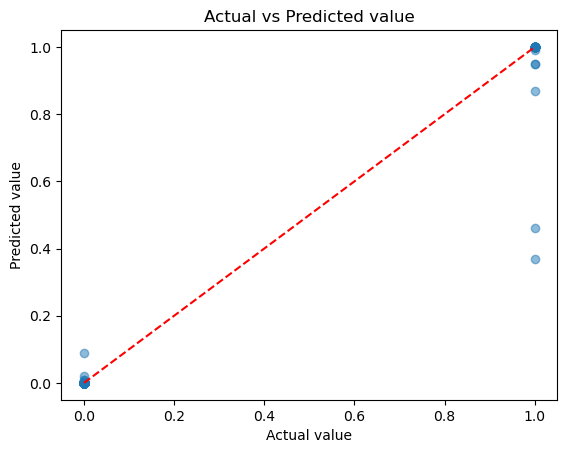

In [106]:
#Visualize
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted value")
plt.show()

In [110]:
results_df = pd.DataFrame({
    "Actual Value": y_test.values,
    "Predicted": y_pred
})
print("Actual vs Predicted Values")
results_df.head(20)

Actual vs Predicted Values


,Actual Value,Predicted
0,1,1.00
1,0,0.00
2,0,0.00
3,0,0.01
4,0,0.00
5,0,0.00
6,1,1.00
7,0,0.00
8,0,0.00
9,0,0.00


In [114]:
pip install openpyxl

In [120]:
from IPython.display import FileLink
results_df.to_csv("results.csv", index=False)
FileLink("results.csv")

C:\Users\Taofeeq\results.csv